# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning


## **Actividad Sesion 5**
## Aprendizaje no supervisado 
## Algoritmo K-means


**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


In [56]:
from sklearn.datasets import make_blobs
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances, silhouette_score, silhouette_samples
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist, euclidean

## Implementacion de KMeans en SKLearn

KLearn tiene su propia implementación de KMeans.

sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

Utiliza la familiar API `.fit()` y `.predict()` a la que estamos acostumbrado/a en otras clases de SKLearn.
- `.fit() `aprende los centroides y las asignaciones de clúster ('etiquetas') para cada observación basándose en tu elección de $k$ y otros hiperparámetros.
- `.predict()` asigna etiquetas de clase a nuevos puntos de datos basándose en sus distancias a los centroides aprendidos.

Usemos el conjunto de datos de Old Faithful.

In [57]:
# leer los datos
old_faithful = pd.read_csv('faithful.csv')
old_faithful

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Text(0, 0.5, 'waiting')

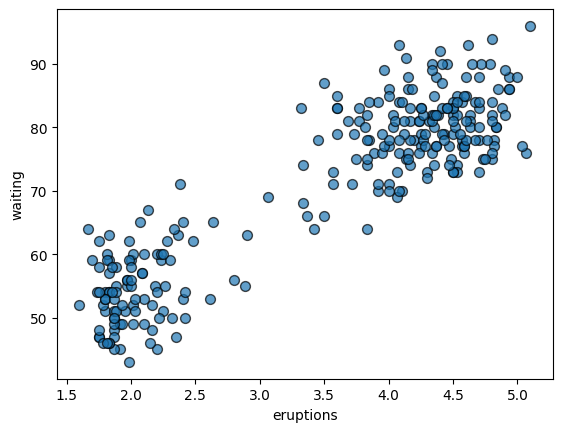

In [58]:
# graficar los datos en un scatter plot
plt.scatter(old_faithful.eruptions, 
            old_faithful.waiting, 
            s=50,
            alpha=0.7,
            edgecolors='black')
plt.xlabel('eruptions')
plt.ylabel('waiting')

Implementar el modelo de K-means


In [59]:
# implementar el modelo de K-means
num_agrup=2
modelo_km=KMeans(n_clusters=num_agrup,
                   init='k-means++',
                   random_state=2024)
modelo_km.fit(old_faithful)

KMeans(n_clusters=2, random_state=2024)

Ahora que hemos 'ajustado' los KMeans, podemos observar varios atributos de nuestros clústeres, como `centers_`, `labels_` e `inertia_`.

In [60]:
#obtenemos los centroides
modelo_km.cluster_centers_

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [61]:
modelo_km.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

Ahora visualicemos los grupos resultantes.

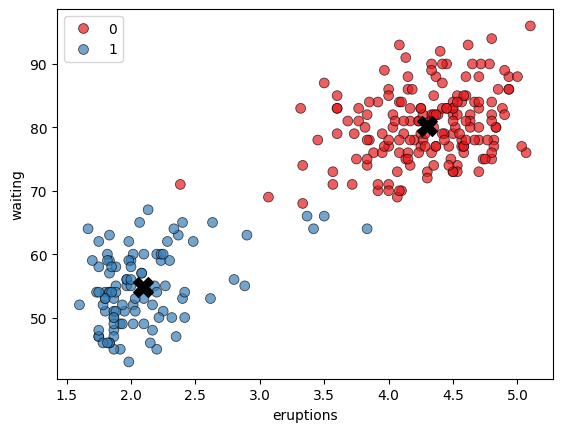

In [62]:
# mostrar los clusters
sns.scatterplot(data=old_faithful,
                x='eruptions',
                y='waiting',
                hue=modelo_km.labels_,
                palette='Set1',
                s=50,
                alpha=0.7,
                edgecolors='black')
plt.scatter(modelo_km.cluster_centers_[:, 0],
            modelo_km.cluster_centers_[:, 1],
            s=200,
            c='black',
            marker='X',
            label='Centroides')

In [63]:

# Indicar el centro
modelo_km.cluster_centers_

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [64]:
modelo_km.inertia_

8901.76872094721

## Optimizacion de clusters



En la siguiente sección, intentaremos agrupar datos de imagenes.
El conjunto de datos consta de 1797 imágenes en escala de grises de 8x8 de dígitos dibujados a mano.

Todavía podemos tratar las imágenes como datos tabulares. La matriz 2D original de valores de píxeles se aplana en un vector de longitud 64. Cada intensidad de píxel es una característica.

In [65]:
X, y = load_digits(return_X_y=True)

In [66]:
X.shape

(1797, 64)

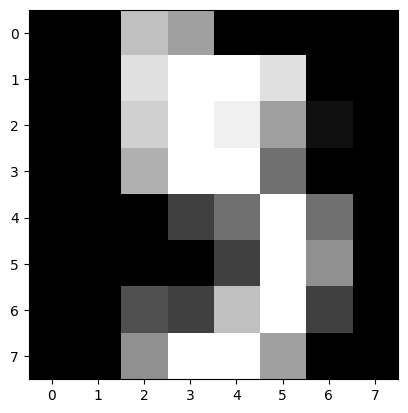

In [67]:
plt.imshow(X[5].reshape(int
                        (np.sqrt
                         (X.shape[1])),
                        -1), 
            cmap='gray');

También tenemos las etiquetas para cada observación en el vector $y$

In [68]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [69]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

#### ⏸ Cuantos parametros predictores tiene este modelo?, Cual es el significado de cada columna predictora?

*64*

#### ⏸ Una vez realizada la optimizacion, cual seria el numero optimo de grupos esperado?

*EL NUMERO OPTIMO DE GRUPOS ES DE 10*

## Agrupación de datos de imagen

Optimizar el valor de K. 
Crear un vector de k que vaya de 2 a 21 clusters 
Ajustar los datos a los clusters y obtener sus parametros de rendimiento. (`inertia` y `Siluhoette Score`)

In [70]:
k_vector = range(2,41)
lista_modelos = []
inercia_modelo = []
for k in k_vector:
    modelo_cluster = KMeans(n_clusters=k, init="k-means++", random_state=2024)
    modelo_cluster.fit(X)
    lista_modelos.append(modelo_cluster)
    inercia_modelo.append(modelo_cluster.inertia_)

Graficar **inertia** en funcion de $k$.

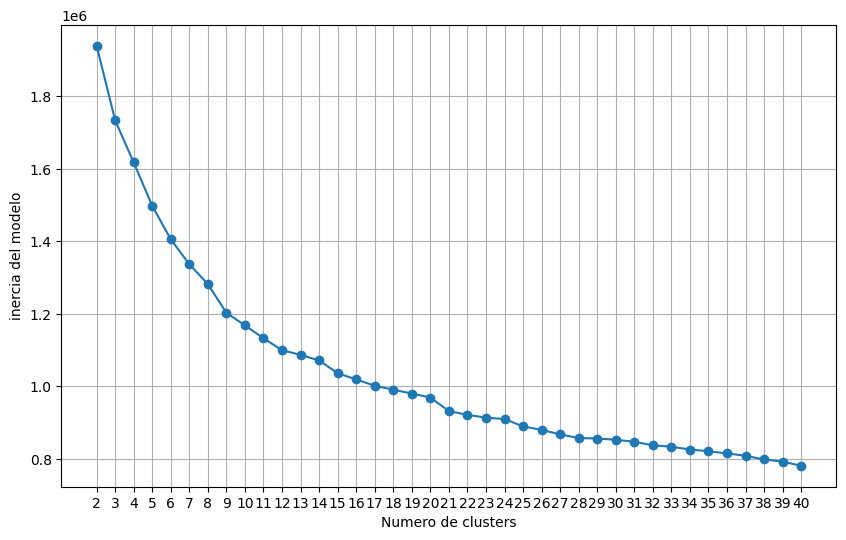

In [71]:
plt.figure(figsize=(10,6))
plt.plot(k_vector,inercia_modelo,"o-")
plt.xlabel("Numero de clusters")
plt.ylabel("inercia del modelo")
plt.xticks(k_vector)
plt.grid()

hay una ligera curva en $k=...$...\
¿Qué sugiere la puntuación de la **silueta**?

In [72]:
modelo_cluster.inertia_

780699.8036213724

### **Actividad asincronica**
La implementacion del algoritmo de Kmeans de `scikitlearn` utiliza distintos algoritmos para implementar este modelo

```python

KMeans(
    n_clusters: Int = 8,
    *,
    init: MatrixLike | ((...) -> Any) | Literal['k-means++', 'random'] = "k-means++",
    n_init: int | Literal['auto', 'warn'] = "warn",
    max_iter: Int = 300,
    tol: Float = 0.0001,
    verbose: Int = 0,
    random_state: Int | None = None,
    copy_x: bool = True,
    algorithm: Literal['lloyd', 'elkan', 'auto', 'full'] = "lloyd"
)
```




1. El algoritmo por default es el de `lloyd`. Implementar el modelo  con distintos los algoritmos disponibles y generar una grafica que muestre el numero de clusteres optimo vs el algoritmo elegido.

2. Si el modelo se optimiza con `init= random`.  Generar una grafica de la distribucion del numero de clusteres optimo. Para  esto:
   - entrene el modelo un numero total de n =100 veces.
   - encuentre el numero de cluster optimo siguiendo la puntuacion de silueta. 
   - Grafique la distribucion del numero de cluster optimo 


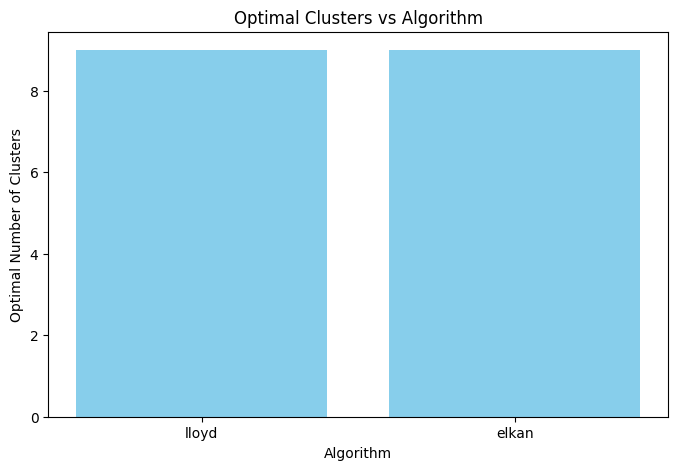

In [74]:
# Task 1: Compare different algorithms for KMeans
algorithms = ['lloyd', 'elkan']
optimal_clusters = []

for algo in algorithms:
    silhouette_scores = []
    for k in range(2, 21):
        model = KMeans(n_clusters=k, 
                       init="k-means++", 
                       algorithm=algo, 
                       random_state=2024)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    optimal_k = range(2, 21)[np.argmax(silhouette_scores)]
    optimal_clusters.append(optimal_k)

# Plot optimal clusters vs algorithms
plt.figure(figsize=(8, 5))
plt.bar(algorithms, optimal_clusters, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Optimal Number of Clusters')
plt.title('Optimal Clusters vs Algorithm')
plt.show()

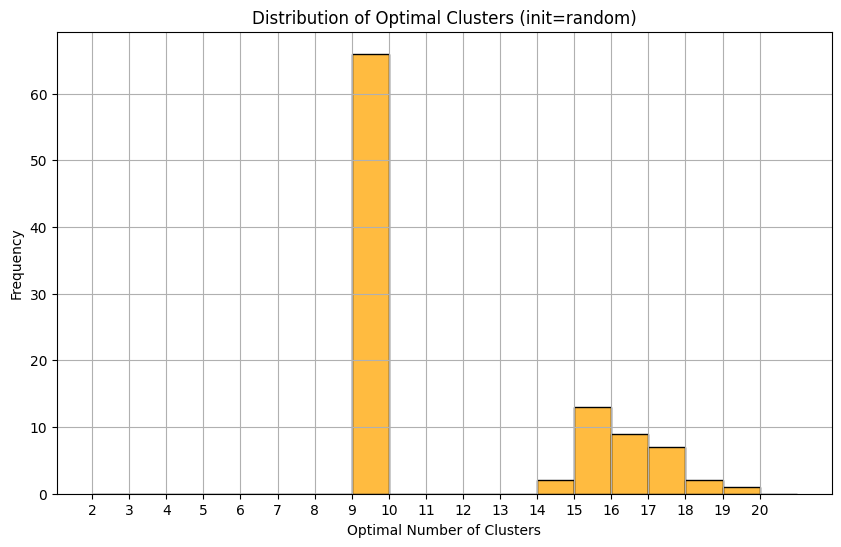

In [75]:
# Task 2: Distribution of optimal clusters with init='random'
optimal_clusters_random = []

for _ in range(100):
    silhouette_scores = []
    for k in range(2, 21):
        model = KMeans(n_clusters=k, init="random", random_state=None)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    optimal_k = range(2, 21)[np.argmax(silhouette_scores)]
    optimal_clusters_random.append(optimal_k)

# Plot distribution of optimal clusters
plt.figure(figsize=(10, 6))
sns.histplot(optimal_clusters_random, bins=range(2, 22), kde=False, color='orange')
plt.xlabel('Optimal Number of Clusters')
plt.ylabel('Frequency')
plt.title('Distribution of Optimal Clusters (init=random)')
plt.xticks(range(2, 21))
plt.grid()
plt.show()